In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn import metrics
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

In [2]:
fname = "доход(12).xls"
data = pd.read_excel(fname)
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,income
0,40,Private,82465,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,<=50K
1,39,Self-emp-inc,329980,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,50,United-States,>50K
2,20,Private,148294,Some-college,10,Never-married,Other-service,Own-child,White,Male,40,United-States,<=50K
3,50,Private,168212,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,65,United-States,>50K
4,38,State-gov,343642,HS-grad,9,Married-civ-spouse,Prof-specialty,Wife,White,Female,40,United-States,>50K


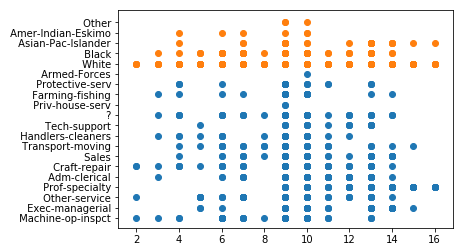

In [33]:
plt.scatter(data['education-num'], data['occupation'])
plt.scatter(data['education-num'], data['race'])

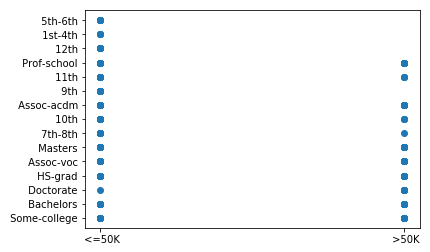

In [43]:
plt.scatter(x=data['income'], y=data['education'])

In [4]:
le = preprocessing.LabelEncoder()

X = data.copy()
X.drop(["education"], axis = 1, inplace=True)

for i in range(X.shape[1]):
    X.iloc[:, i] = le.fit_transform(X.iloc[:, i])

Y = le.fit_transform(data["income"])
    
#X.tail()
#Y

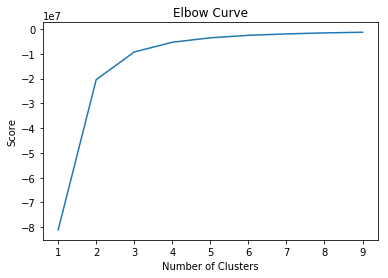

In [5]:
nrange = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in nrange]
scores = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]

plt.plot(nrange,scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

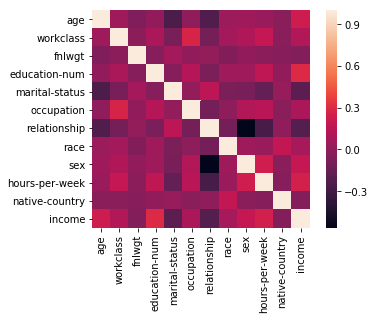

In [6]:
cor = X.iloc[:,:].corr()
sns.heatmap(cor,square=True)

In [7]:
n_clusters = 2
km = KMeans(n_clusters=n_clusters)

In [8]:
X['cluster'] = km.fit_predict(X)
Y_pred = X['cluster']
X.tail()

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,income,cluster
996,13,3,632,11,4,4,4,4,0,34,28,1,0
997,27,3,87,8,0,7,1,4,1,39,28,0,1
998,32,3,276,7,2,12,0,4,1,48,28,1,1
999,57,5,23,12,3,10,1,4,0,39,28,0,1
1000,20,3,930,11,2,12,0,4,1,43,28,1,0


In [45]:
print(metrics.accuracy_score(Y, X['cluster']))
print(np.corrcoef(Y, X['cluster']))

0.5324675324675324
[[1.       0.072803]
 [0.072803 1.      ]]


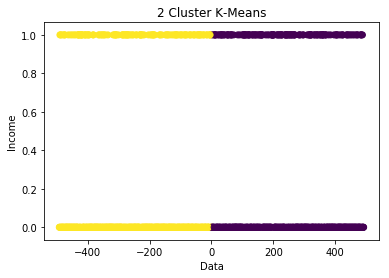

In [10]:
pca = PCA(n_components=1).fit_transform(X)
kmoutput = km.fit(X)

plt.figure('2 Cluster K-Means')
plt.scatter(pca, Y, c=kmoutput.labels_)
#plt_b.scatter(pca, X['income'], c=kmoutput.labels_)
plt.xlabel('Data')
plt.ylabel('Income')
plt.title('2 Cluster K-Means')
plt.show()